# Lab 7- Deep Learning Model

This lab is meant to get you started in using Keras to design Deep Neural Networks. The goal here is to simply repeat your previous lab, but with DNNs.

Let's start with reading the data, like before:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename="../Lab5/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi","MET", "MET_phi", "MET_rel", "axial_MET"]
FeatureNames=["M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

df = pd.read_csv(filename, dtype='float64', names=VarNames)

Now lets define training and test samples. Note that DNNs take very long to train, so for testing purposes we will use only about 10% of the 5 million events in the training/validation sample. Once you get everything working, make the final version of your plots with the full sample. 

Also note that Keras had trouble with the Pandas tensors, so after doing all of the nice manipulation that Pandas enables, we convert the Tensor to a regular numpy tensor.

In [2]:
N_Max=550000
N_Train=500000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:N_Max]

X_Train=np.array(Train_Sample[VarNames[1:]])
y_Train=np.array(Train_Sample["signal"])

X_Test=np.array(Test_Sample[VarNames[1:]])
y_Test=np.array(Test_Sample["signal"])


In [3]:
len(Train_Sample)

500000

In [4]:
Test_Sample[RawNames]

,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET
500000,0.668017,-1.013524,1.661522,0.806839,0.265961,-0.168963,1.340346,-1.161350,1.842903,1.294678
500001,0.758622,-1.889814,-0.450389,0.515570,-1.337005,1.516792,0.808083,1.147602,0.762667,-0.495574
500002,0.493883,0.913933,0.694969,0.570579,-0.347849,-0.592389,0.521400,1.729667,0.782686,-0.137734
500003,1.957878,1.432911,0.676945,2.849261,0.902924,-1.202544,0.529155,0.519204,0.162923,0.491965
500004,0.318110,0.191319,1.317739,0.453759,-0.209570,-0.177090,1.554429,-0.414713,0.750299,-0.544499
...,...,...,...,...,...,...,...,...,...,...
549995,0.600980,1.173203,0.967225,0.826618,0.719335,-1.261557,0.531168,-0.320511,0.797347,-0.213524
549996,0.538633,0.299339,0.053098,0.535128,-0.115665,0.645123,0.671151,-1.322003,0.490847,-0.336382
549997,1.883531,1.002153,0.419530,1.700726,0.876175,-1.388113,0.399555,-1.032908,0.353813,-0.061068
549998,1.253973,-0.853027,-0.595151,1.374145,0.866602,1.137384,0.260310,0.943332,0.107184,0.072969


## Exercise 7.1

You will need to create several models and make sure they are properly trained. Write a function that takes this history and plots the values versus epoch. For every model that you train in the remainder of this lab, assess:

* Has you model's performance plateaued? If not train for more epochs. 
* Compare the performance on training versus test sample. Are you over training?

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import numpy as np

**model 1**

In [6]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M2


2023-07-11 11:51:25.845326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-11 11:51:25.845973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_Train,y_Train, validation_split=0.1, epochs=12, batch_size=2048)

Epoch 1/12


2023-07-11 11:51:52.276943: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-11 11:51:52.523122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


220/220 [==============================] - 2s 7ms/step - loss: 0.6246 - accuracy: 0.6425 - val_loss: 0.4892 - val_accuracy: 0.7737
Epoch 2/12
  1/220 [..............................] - ETA: 1s - loss: 0.5035 - accuracy: 0.7651

2023-07-11 11:51:54.010410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


220/220 [==============================] - 1s 6ms/step - loss: 0.4643 - accuracy: 0.7853 - val_loss: 0.4558 - val_accuracy: 0.7916
Epoch 3/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4517 - accuracy: 0.7920 - val_loss: 0.4507 - val_accuracy: 0.7931
Epoch 4/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4480 - accuracy: 0.7935 - val_loss: 0.4473 - val_accuracy: 0.7952
Epoch 5/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4451 - accuracy: 0.7950 - val_loss: 0.4447 - val_accuracy: 0.7954
Epoch 6/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4425 - accuracy: 0.7960 - val_loss: 0.4421 - val_accuracy: 0.7973
Epoch 7/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4406 - accuracy: 0.7970 - val_loss: 0.4406 - val_accuracy: 0.7983
Epoch 8/12
220/220 [==============================] - 1s 6ms/step - loss: 0.4394 - accuracy: 0.7973 - val_loss: 0.4405 - val_accuracy: 0.7979
Epoch 9/12
220/22

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                228       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.evaluate(X_Test,y_Test)
score1 = model.evaluate(X_Test, y_Test, verbose=1)
print('Model Test accuracy:', score1[1])
print('Model Test loss:', score1[0])

1563/1563 [==============================] - 5s 3ms/step - loss: 0.4401 - accuracy: 0.7952
Model Test accuracy: 0.7952200174331665
Model Test loss: 0.44013893604278564


In [11]:
print(history.history)

{'loss': [0.6246070861816406, 0.4643065631389618, 0.45174336433410645, 0.44800829887390137, 0.4451195001602173, 0.4424920380115509, 0.44056767225265503, 0.4393695890903473, 0.43844181299209595, 0.43783992528915405, 0.43745848536491394, 0.4368545114994049], 'accuracy': [0.6424933075904846, 0.7852511405944824, 0.7920466661453247, 0.7935000061988831, 0.7949666380882263, 0.7959533333778381, 0.7969555258750916, 0.7973155379295349, 0.7978711128234863, 0.7978555560112, 0.7979910969734192, 0.7982422113418579], 'val_loss': [0.4892394244670868, 0.45582109689712524, 0.4506571590900421, 0.44727858901023865, 0.4447387456893921, 0.4420912563800812, 0.44058069586753845, 0.4404810667037964, 0.4387604594230652, 0.4384087920188904, 0.43800026178359985, 0.4371682107448578], 'val_accuracy': [0.7736799716949463, 0.7915800213813782, 0.7931200265884399, 0.7952399849891663, 0.7953799962997437, 0.7972800135612488, 0.7982800006866455, 0.7979000210762024, 0.7989000082015991, 0.7983800172805786, 0.799059987068176

In [12]:
def plot_accuracy_and_loss(history):
    metrics = [('accuracy', 'Accuracy'), ('loss', 'Loss')]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for i, (metric, ylabel) in enumerate(metrics):
        axes[i].plot(history.history[metric])
        axes[i].plot(history.history[f'val_{metric}'])
        axes[i].set_title(f'Model {ylabel}')
        axes[i].set_ylabel(ylabel)
        axes[i].set_xlabel('Epoch')
        axes[i].legend(['Train', 'Test'], loc='lower right')

    fig.tight_layout()
    plt.show()
        

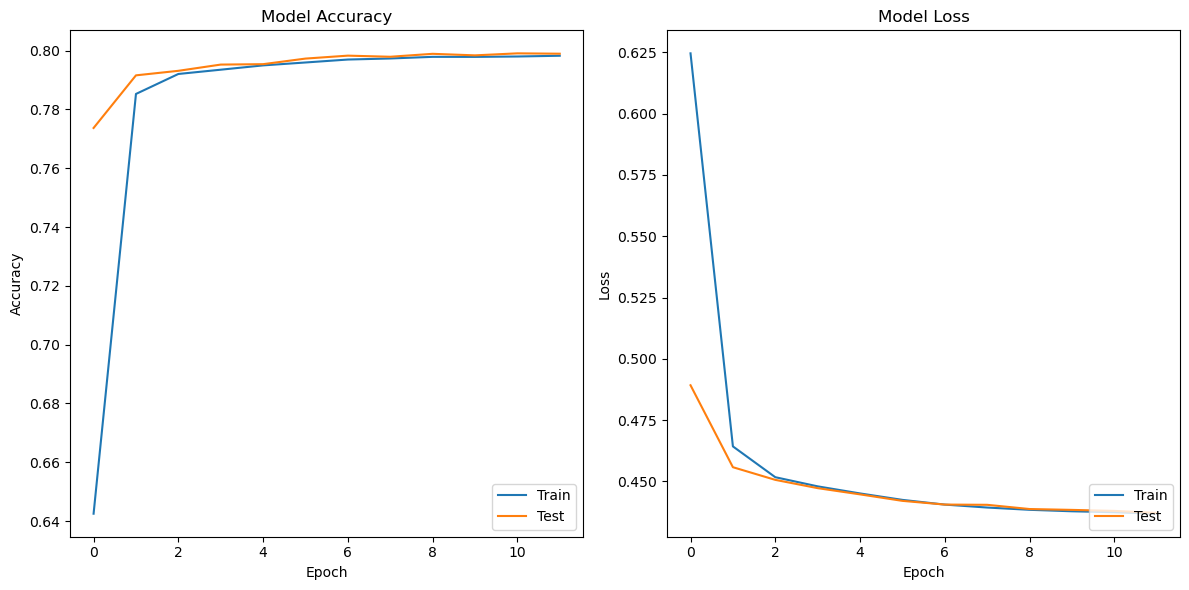

In [13]:
plot_accuracy_and_loss(history)

**model 2**

In [14]:
model2 = Sequential()
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(12, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [15]:
model2.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

In [16]:
history2 = model2.fit(X_Train,y_Train, validation_data=(X_Test,y_Test), epochs=12, batch_size=2048)

Epoch 1/12


2023-07-11 11:56:37.691264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 3s 9ms/step - loss: 0.5242 - accuracy: 0.7347 - val_loss: 0.4549 - val_accuracy: 0.7889
Epoch 2/12
  1/245 [..............................] - ETA: 2s - loss: 0.4561 - accuracy: 0.7837

2023-07-11 11:56:39.845472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 2s 7ms/step - loss: 0.4454 - accuracy: 0.7943 - val_loss: 0.4443 - val_accuracy: 0.7939
Epoch 3/12
245/245 [==============================] - 2s 7ms/step - loss: 0.4397 - accuracy: 0.7972 - val_loss: 0.4438 - val_accuracy: 0.7948
Epoch 4/12
245/245 [==============================] - 2s 7ms/step - loss: 0.4375 - accuracy: 0.7984 - val_loss: 0.4396 - val_accuracy: 0.7966
Epoch 5/12
245/245 [==============================] - 2s 8ms/step - loss: 0.4362 - accuracy: 0.7990 - val_loss: 0.4389 - val_accuracy: 0.7965
Epoch 6/12
245/245 [==============================] - 2s 7ms/step - loss: 0.4352 - accuracy: 0.7994 - val_loss: 0.4383 - val_accuracy: 0.7967
Epoch 7/12
245/245 [==============================] - 2s 8ms/step - loss: 0.4345 - accuracy: 0.7999 - val_loss: 0.4383 - val_accuracy: 0.7958
Epoch 8/12
245/245 [==============================] - 2s 8ms/step - loss: 0.4339 - accuracy: 0.8003 - val_loss: 0.4375 - val_accuracy: 0.7969
Epoch 9/12
245/24

In [17]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                304       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 12)                204       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                

In [18]:
model2.evaluate(X_Test,y_Test)
score2 = model2.evaluate(X_Test, y_Test, verbose=1)
print('Model Test accuracy:', score2[1])
print('Model Test loss:', score2[0])

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4380 - accuracy: 0.7960
Model Test accuracy: 0.7959799766540527
Model Test loss: 0.4379933178424835


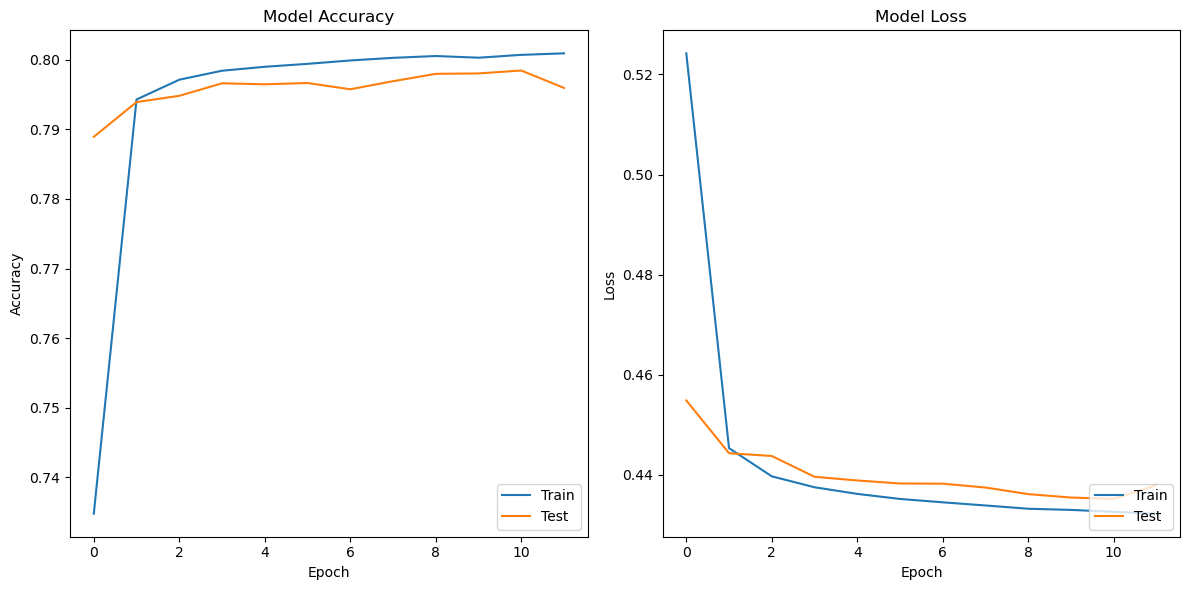

In [19]:
plot_accuracy_and_loss(history2)

**model 3**

In [20]:
model3 = Sequential()
model3.add(Dense(300, activation='relu'))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [21]:
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history3 = model3.fit(X_Train,y_Train, validation_data=(X_Test,y_Test), epochs=20,batch_size=2048)

Epoch 1/20


2023-07-11 11:57:56.831800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - ETA: 0s - loss: 0.4483 - accuracy: 0.7913

2023-07-11 11:58:00.936597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 5s 17ms/step - loss: 0.4483 - accuracy: 0.7913 - val_loss: 0.4377 - val_accuracy: 0.7973
Epoch 2/20
245/245 [==============================] - 4s 15ms/step - loss: 0.4337 - accuracy: 0.8000 - val_loss: 0.4354 - val_accuracy: 0.7981
Epoch 3/20
245/245 [==============================] - 4s 16ms/step - loss: 0.4315 - accuracy: 0.8008 - val_loss: 0.4361 - val_accuracy: 0.7969
Epoch 4/20
245/245 [==============================] - 4s 16ms/step - loss: 0.4299 - accuracy: 0.8018 - val_loss: 0.4334 - val_accuracy: 0.7992
Epoch 5/20
245/245 [==============================] - 4s 14ms/step - loss: 0.4293 - accuracy: 0.8020 - val_loss: 0.4328 - val_accuracy: 0.7990
Epoch 6/20
245/245 [==============================] - 4s 16ms/step - loss: 0.4277 - accuracy: 0.8028 - val_loss: 0.4317 - val_accuracy: 0.7990
Epoch 7/20
245/245 [==============================] - 4s 16ms/step - loss: 0.4269 - accuracy: 0.8033 - val_loss: 0.4326 - val_accuracy: 0.7998
Epoch 8/20

In [24]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               5700      
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dense_13 (Dense)            (None, 300)               90300     
                                                                 
 dense_14 (Dense)            (None, 300)               90300     
                                                                 
 dense_15 (Dense)            (None, 1)                 301       
                                                                 
Total params: 367,201
Trainable params: 367,201
Non-tr

In [23]:
model3.evaluate(X_Test,y_Test)
score3 = model3.evaluate(X_Test, y_Test, verbose=1)
print('Model Test accuracy:', score3[1])
print('Model Test loss:', score3[0])

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4319 - accuracy: 0.7987
Model Test accuracy: 0.798740029335022
Model Test loss: 0.43194258213043213


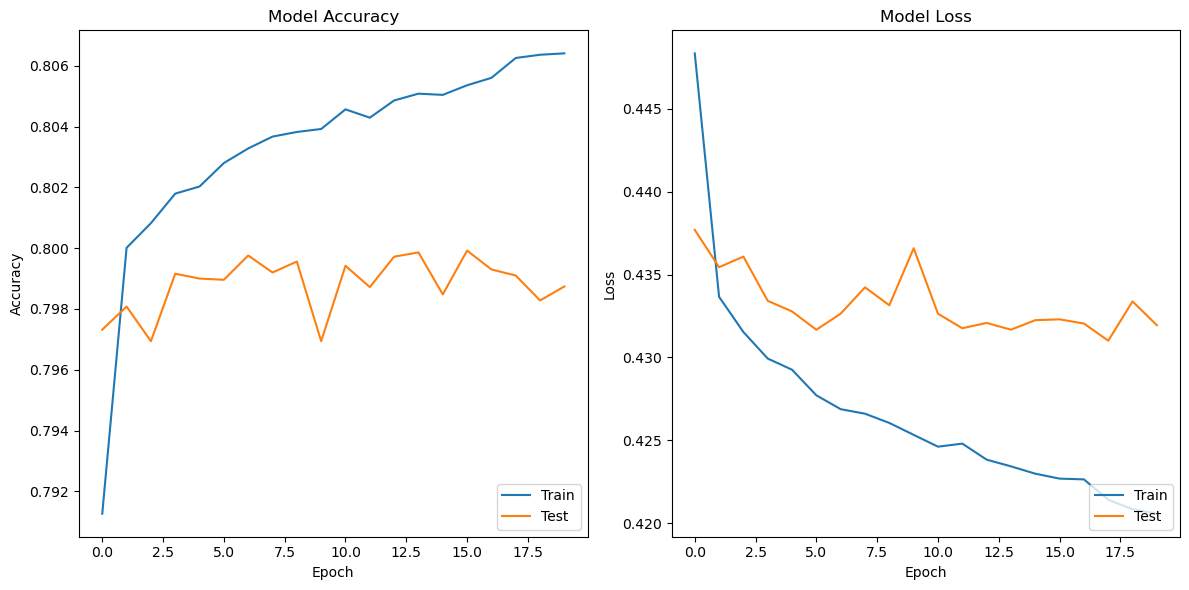

In [25]:
plot_accuracy_and_loss(history3)

## Exercise 7.2

Following the original paper (see lab 5), make a comparison of the performance (using ROC curves and AUC) between models trained with raw, features, and raw+features data.

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

model_raw = Sequential()
model_raw.add(Dense(12, activation='relu'))
model_raw.add(Dense(8, activation='relu'))
model_raw.add(Dense(1, activation='sigmoid'))

model_raw.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_raw.fit(X_Train[:, :len(RawNames)], y_Train, epochs=12, batch_size=2048)

y_pred_raw = model_raw.predict(X_Test[:, :len(RawNames)]).flatten()
fpr_raw, tpr_raw, thresholds_raw = roc_curve(y_Test, y_pred_raw)
auc_raw = roc_auc_score(y_Test, y_pred_raw)


Epoch 1/12
  1/245 [..............................] - ETA: 1:14 - loss: 0.6943 - accuracy: 0.4888

2023-07-11 12:27:47.494030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 2s 6ms/step - loss: 0.5724 - accuracy: 0.6806
Epoch 2/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4688 - accuracy: 0.7823
Epoch 3/12
245/245 [==============================] - 1s 6ms/step - loss: 0.4624 - accuracy: 0.7853
Epoch 4/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4578 - accuracy: 0.7869
Epoch 5/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4550 - accuracy: 0.7881
Epoch 6/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4535 - accuracy: 0.7887
Epoch 7/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4526 - accuracy: 0.7894
Epoch 8/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4518 - accuracy: 0.7900
Epoch 9/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4511 - accuracy: 0.7904
Epoch 10/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.7909
Epoch 11/1

2023-07-11 12:28:03.538427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 2s 1ms/step


In [51]:
model_features = Sequential()
model_features.add(Dense(12, activation='relu'))
model_features.add(Dense(8, activation='relu'))
model_features.add(Dense(1, activation='sigmoid'))

model_features.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_features.fit(X_Train[:, len(RawNames):], y_Train, epochs=12, batch_size=2048)

y_pred_features = model_features.predict(X_Test[:, len(RawNames):])
fpr_features, tpr_features, thresholds_features = roc_curve(y_Test, y_pred_features)
auc_features = roc_auc_score(y_Test, y_pred_features)


Epoch 1/12


2023-07-11 12:29:03.505571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 2s 6ms/step - loss: 0.6196 - accuracy: 0.6635
Epoch 2/12
245/245 [==============================] - 1s 5ms/step - loss: 0.5256 - accuracy: 0.7470
Epoch 3/12
245/245 [==============================] - 1s 5ms/step - loss: 0.5094 - accuracy: 0.7567
Epoch 4/12
245/245 [==============================] - 1s 5ms/step - loss: 0.5004 - accuracy: 0.7626
Epoch 5/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4930 - accuracy: 0.7676
Epoch 6/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4867 - accuracy: 0.7715
Epoch 7/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4825 - accuracy: 0.7736
Epoch 8/12
245/245 [==============================] - 1s 6ms/step - loss: 0.4800 - accuracy: 0.7749
Epoch 9/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4785 - accuracy: 0.7760
Epoch 10/12
245/245 [==============================] - 1s 6ms/step - loss: 0.4774 - accuracy: 0.7767
Epoch 11/1

2023-07-11 12:29:19.580906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 2s 1ms/step


In [53]:
model_combined = Sequential()
model_combined.add(Dense(12, activation='relu'))
model_combined.add(Dense(8, activation='relu'))
model_combined.add(Dense(1, activation='sigmoid'))

model_combined.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_combined.fit(X_Train, y_Train, epochs=12, batch_size=2048)

y_pred_combined = model_combined.predict(X_Test)
fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_Test, y_pred_combined)
auc_combined = roc_auc_score(y_Test, y_pred_combined)


Epoch 1/12
  1/245 [..............................] - ETA: 1:12 - loss: 0.6951 - accuracy: 0.5044

2023-07-11 12:30:33.343905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


245/245 [==============================] - 2s 6ms/step - loss: 0.5529 - accuracy: 0.7233
Epoch 2/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4505 - accuracy: 0.7920
Epoch 3/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.7961
Epoch 4/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4395 - accuracy: 0.7976
Epoch 5/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4379 - accuracy: 0.7983
Epoch 6/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4370 - accuracy: 0.7986
Epoch 7/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4364 - accuracy: 0.7988
Epoch 8/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4358 - accuracy: 0.7992
Epoch 9/12
245/245 [==============================] - 1s 6ms/step - loss: 0.4353 - accuracy: 0.7995
Epoch 10/12
245/245 [==============================] - 1s 5ms/step - loss: 0.4349 - accuracy: 0.7997
Epoch 11/1

2023-07-11 12:30:49.524300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 2s 1ms/step


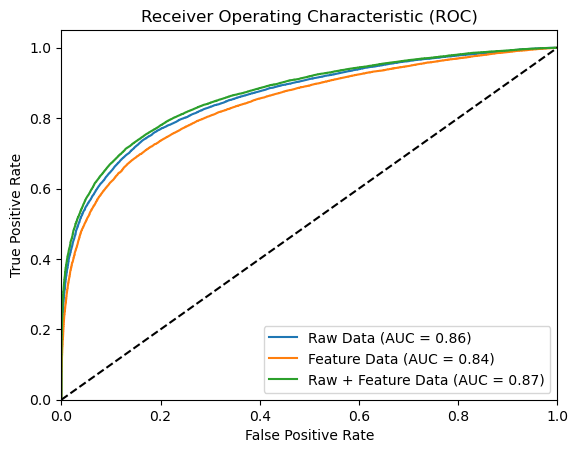

In [54]:
plt.plot(fpr_raw, tpr_raw, label='Raw Data (AUC = %0.2f)' % auc_raw)
plt.plot(fpr_features, tpr_features, label='Feature Data (AUC = %0.2f)' % auc_features)
plt.plot(fpr_combined, tpr_combined, label='Raw + Feature Data (AUC = %0.2f)' % auc_combined)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Exercise 7.3

Design and implement at least 3 different DNN models. Train them and compare performance. You may try different architectures, loss functions, and optimizers to see if there is an effect.

In [105]:
#done in previous cells for Exercise 7.1

## Exercise 7.4

Repeat exercise 4 from Lab 6, adding your best performing DNN as one of the models.  


844/844 [==============================] - 1s 1ms/step


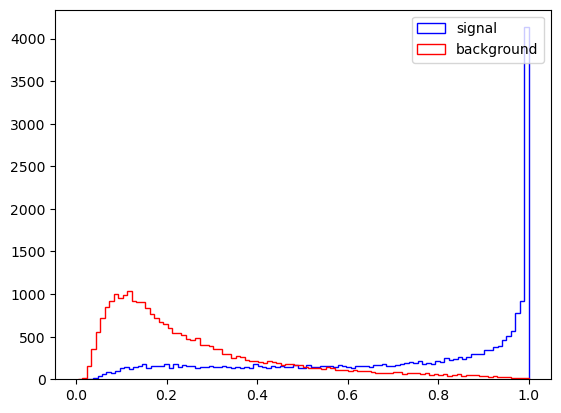

In [56]:
plt.figure()
plt.hist(model_combined.predict(X_Test[y_Test == 1]), bins=100, histtype="step", color="blue", label="signal", stacked=True)
plt.hist(model_combined.predict(X_Test[y_Test == 0]), bins=100, histtype="step", color="red", label="background", stacked=True)
plt.legend(loc='upper right')
plt.show()


In [61]:
from IPython.display import HTML, display
import tabulate

In [57]:
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

In [58]:
def compare_significance(Test_sig, Test_bkg, obs_name, scenarios, model, bins=100, log=False):
    TPR, bins_sig = compute_rate(Test_sig[obs_name], bins=bins)
    FPR, bins_sig = compute_rate(Test_bkg[obs_name], bins=bins_sig)

    max_sigs = dict()
    table = list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        # Prepare the input data for prediction
        X_sig = np.array(Test_sig.drop("signal", axis=1))
        X_bkg = np.array(Test_bkg.drop("signal", axis=1))

        # Predict the probabilities using your trained model
        prob_sig = model.predict(X_sig)[:, 0]
        prob_bkg = model.predict(X_bkg)[:, 0]

        n_sig_expected_prime *= prob_sig[:len(n_sig_expected_prime)]
        n_bkg_expected_prime *= prob_bkg[:len(n_bkg_expected_prime)]

        sig = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime)
        plt.step(bins_sig[:-1], sig, label=name + " " + str((n_sig_expected, n_bkg_expected)))

        max_i = np.argmax(sig)
        max_sigs[name] = (max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i])
        table.append((name, n_sig_expected, n_bkg_expected, TPR[max_i], FPR[max_i], n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i], max_i))

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["Name", 'N sig', 'N bkg', "TPR", "FPR", "N sig'", "N bkg'", 'sig', 'x_c', "bin i"])))

    return max_sigs


In [59]:
Test_sig = Test_Sample[y_Test == 1]
Test_bkg = Test_Sample[y_Test == 0]

M_R
844/844 [==============================] - 1s 1ms/step


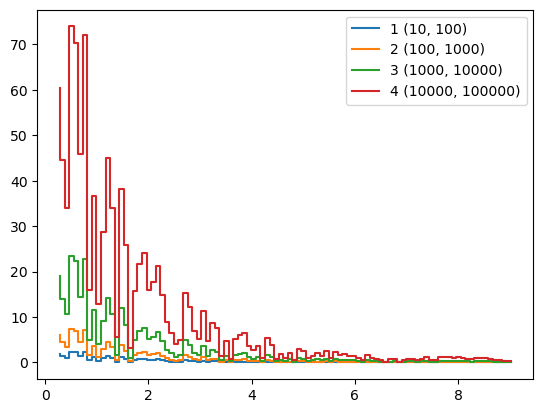

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.914678,0.693046,9.10681,6.06761,2.33782,0.550778,3
2,100,1000,0.914678,0.693046,91.0681,60.6761,7.39282,0.550778,3
3,1000,10000,0.914678,0.693046,910.681,606.761,23.3782,0.550778,3
4,10000,100000,0.914678,0.693046,9106.81,6067.61,73.9282,0.550778,3


M_TR_2
844/844 [==============================] - 1s 1ms/step


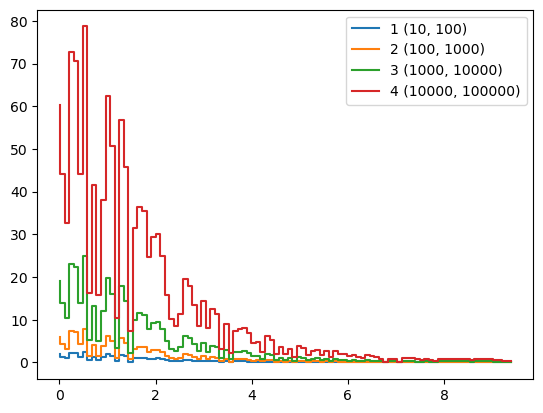

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.893641,0.69544,8.91776,3.93024,2.48793,0.582224,6
2,100,1000,0.893641,0.69544,89.1776,39.3024,7.86752,0.582224,6
3,1000,10000,0.893641,0.69544,891.776,393.024,24.8793,0.582224,6
4,10000,100000,0.893641,0.69544,8917.76,3930.24,78.6752,0.582224,6


R
844/844 [==============================] - 1s 1ms/step


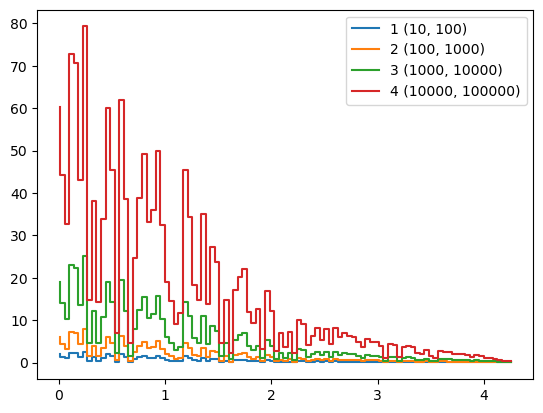

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.982744,0.973919,9.80693,5.50405,2.50629,0.270454,6
2,100,1000,0.982744,0.973919,98.0693,55.0405,7.92559,0.270454,6
3,1000,10000,0.982744,0.973919,980.693,550.405,25.0629,0.270454,6
4,10000,100000,0.982744,0.973919,9806.93,5504.05,79.2559,0.270454,6


MT2
844/844 [==============================] - 1s 1ms/step


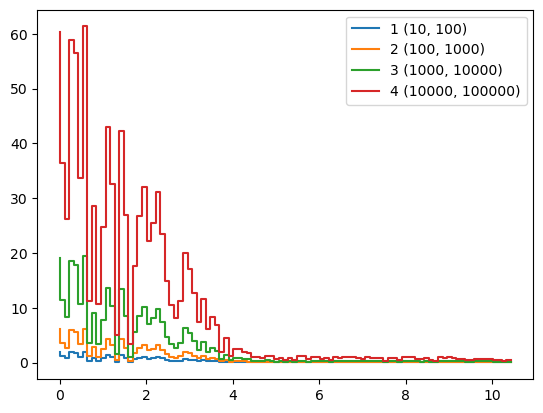

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.593428,0.601415,5.9219,3.39887,1.9397,0.632373,6
2,100,1000,0.593428,0.601415,59.219,33.9887,6.13388,0.632373,6
3,1000,10000,0.593428,0.601415,592.19,339.887,19.397,0.632373,6
4,10000,100000,0.593428,0.601415,5921.9,3398.87,61.3388,0.632373,6


S_R
844/844 [==============================] - 1s 1ms/step


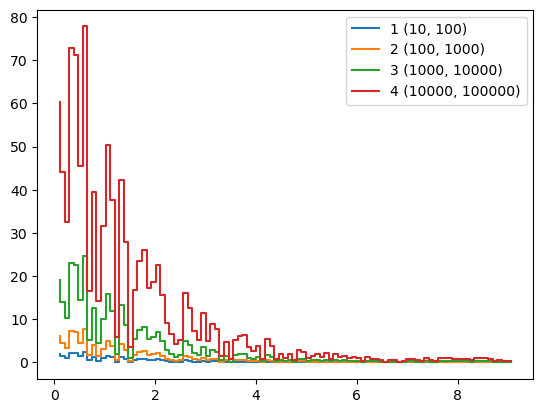

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.836093,0.557412,8.34348,3.15019,2.46104,0.655334,6
2,100,1000,0.836093,0.557412,83.4348,31.5019,7.78248,0.655334,6
3,1000,10000,0.836093,0.557412,834.348,315.019,24.6104,0.655334,6
4,10000,100000,0.836093,0.557412,8343.48,3150.19,77.8248,0.655334,6


M_Delta_R
844/844 [==============================] - 1s 1ms/step


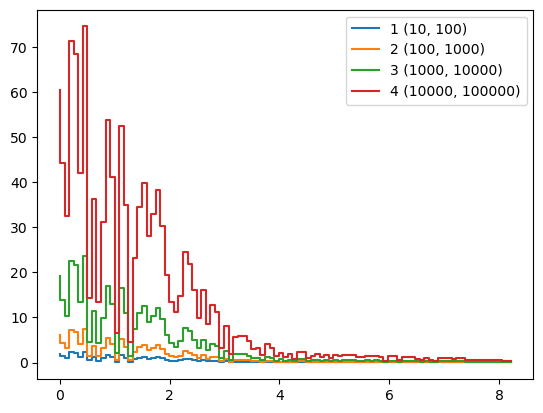

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.82388,0.700319,8.2216,3.95781,2.35583,0.502649,6
2,100,1000,0.82388,0.700319,82.216,39.5781,7.44978,0.502649,6
3,1000,10000,0.82388,0.700319,822.16,395.781,23.5583,0.502649,6
4,10000,100000,0.82388,0.700319,8221.6,3957.81,74.4978,0.502649,6


dPhi_r_b
844/844 [==============================] - 1s 1ms/step


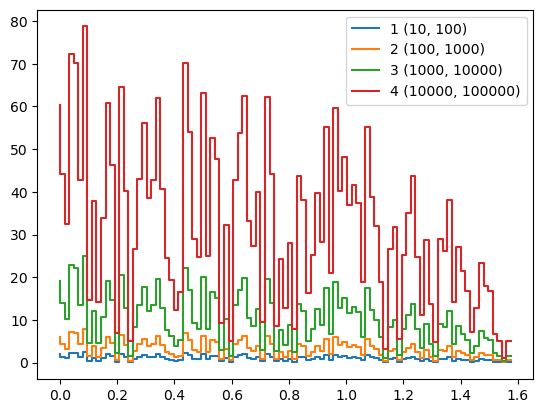

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.971878,0.96877,9.6985,5.47495,2.48979,0.0955607,6
2,100,1000,0.971878,0.96877,96.985,54.7495,7.8734,0.0955607,6
3,1000,10000,0.971878,0.96877,969.85,547.495,24.8979,0.0955607,6
4,10000,100000,0.971878,0.96877,9698.5,5474.95,78.734,0.0955607,6


cos_theta_r1
844/844 [==============================] - 1s 1ms/step


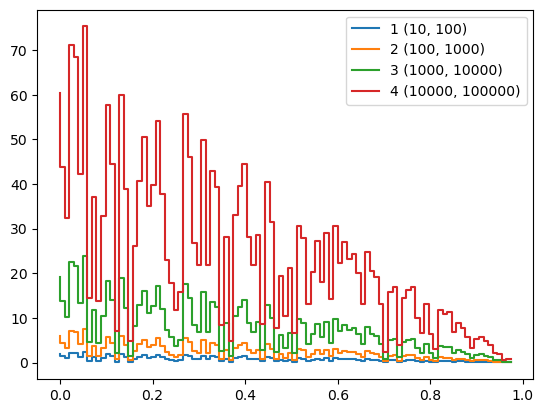

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.845525,0.729257,8.43761,4.12136,2.38091,0.0590667,6
2,100,1000,0.845525,0.729257,84.3761,41.2136,7.52909,0.0590667,6
3,1000,10000,0.845525,0.729257,843.761,412.136,23.8091,0.0590667,6
4,10000,100000,0.845525,0.729257,8437.61,4121.36,75.2909,0.0590667,6


In [63]:
scenarios = {
    "1": (10, 100),
    "2": (100, 1000),
    "3": (1000, 10000),
    "4": (10000, 100000)
}

for obs in FeatureNames:
    print(obs)
    _ = compare_significance(Test_sig, Test_bkg, obs, scenarios, model_combined)
